In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./데이터/glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


### 이상치 데이터
- 데이터 특성의 분포를 볼때 주로 나타나는 값의 분포가 아니고 값이 너무 크거나 너무 작은 경우 이상치로 판단을 함
    - 보통 사분위수를 기준으로 이상치를 판단하지만 도메인적인 판단이 가능함
- 사분위수로는 이상치지만 도메인적인 판단을 정상데이터로 처리한다면 왜도가 심한 데이터의 분포로 나타날 수 있음
    - 왜도 처리 전처리 진행해야 함

### 사분위수
- 사분위수 : 데이터 집단을 크기순으로 나열 했을 때 4개의 구간으로 나눌 수 있고, 구간의 경계점을 1,2,3,4분위수라고 명칭함
    - Q1, Q2, Q3로 표현되어 있음
    - IQR : 데이터의 분포가 가장 많은 구간 Q1에서 Q3까지의 구간
    - Outliers : 이상치
        - Upper : Q3 + IQR * 1.5
        - Lower : Q1 - IQR * 1.5
        - 이상치는 학습데이터를 기준으로 설정
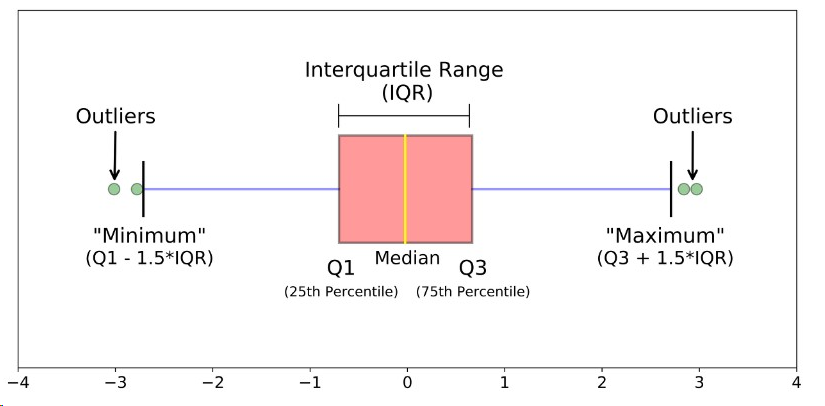

In [5]:
X = df.drop('Type', axis = 1)
y = df['Type']

In [7]:
Train_X, Test_X, Train_y, Test_y = train_test_split(X,
                                                   y,
                                                   random_state = 4)
Train_X.shape

(160, 8)

In [17]:
## IQR_rul을 계산하는 함수를 생성해서 사용
def IQR_rule(val_list) : # val_list로는 컬럼값을 전달(열벡터)
    # IQR 계산
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1
    
    # IQR  rule을 위배하지 않는 bool list를 계산해서 반환
    # 이상치의 조건 :  Q3 + 1.5 * IQR 초과하거나 Q1 - 1.5 * IQR 미만이거나
    # Q3 + 1.5 * IQR > val_list 는 val_list가 상위 이상치 이하면 True
    # Q3 + 1.5 * IQR <= val_list
    # Q1 - 1.5 * IQR < val_list 는 vla_list가 하위 이상치 이상이면 True
    # Q1 - 1.5 * IQR >= val_list
    not_out_cond = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    # Q1, Q3, IQR 값은 저장해야 함
    return not_out_cond

In [10]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


In [16]:
tmp = IQR_rule(df['RI'])

0.002634999999999943

In [19]:
# df.apply(함수명)
# 파라미터로 전달된 함수를 df의 컬럼 혹은 레코드 별로 파라미터로 전달하면서 함수를
# 자동으로 호출해 주는 함수(벡터화연산을 가능하게 하는 함수)
conditions = Train_X.apply(IQR_rule)
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
84,True,True,True,True,True,True,True,True
172,True,True,False,False,False,False,False,True
12,True,True,True,True,True,True,True,True
210,True,True,False,True,True,True,True,True
179,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
129,True,True,True,True,True,True,False,True
197,True,True,False,False,True,True,True,True
183,True,True,False,True,True,True,False,True
174,True,True,True,True,True,True,True,False


- tip. 
    - 이상치 확인은 특성별로(column) 진행
    - 삭제는 레코드(row)별로 진행
    - 레코드의 각 특성 중 이상치가 하나라도 있으면 해당레코드는 제거를 하는게 일반적인 방법
    - 이상치를 제거 했을 때 학습데이터 수가 급격히 줄어들면
        - 이상치 범위를 좁혀서 데이터를 유지하는 방법을 먼저 사용해 본다

In [21]:
# 컬럼수
len(Train_X.columns)

8

In [25]:
# condition의 각 레코드 값을 합산했을 때 8과 같으면
# 이상치가 없는 레코드라서 사용 
tot_cond = conditions.sum(axis = 1) == len(Train_X.columns)
tot_cond

84      True
172    False
12      True
210    False
179     True
       ...  
129    False
197    False
183    False
174    False
122     True
Length: 160, dtype: bool

In [30]:
Train_X = Train_X.loc[tot_cond]
Train_X.shape

(112, 8)